<a href="https://colab.research.google.com/github/ritwiks9635/Generative_Model/blob/main/Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Convolutional autoencoder for image denoising**

[Keras Blog](https://blog.keras.io/building-autoencoders-in-keras.html)

An autoencoder is a type of artificial neural network (ANN) used in machine learning and artificial intelligence for unsupervised learning. Autoencoders are designed to encode input data into a lower-dimensional representation, called the "latent space," and then decode it back to the original data format. This process is called learning to reconstruct the input.

###**Autoencoders learn two functions:**
- Encoding function: Transforms the input data
- Decoding function: Recreates the input data from the encoded representation


The main objective of an autoencoder is to get an output identical to the input. The decoder architecture is usually a mirror image of the encoder, but this is not a requirement. The only requirement is that the dimensionality of the input and output must be the same.

###**Autoencoders are useful for various applications, including:**

**Compressing data**
Autoencoders can compress images, text, and other data, which can be useful for sharing and saving in a faster and more memory efficient way.

**Dimensionality reduction**
Autoencoders can learn a lower-dimensional representation for higher-dimensional data by training the network to capture the most important parts of the input.

**Image denoising and recovering**
Autoencoders can be used to denoise images, recover images, and generate new images.

**Wireless communications**
Autoencoders can add redundancy and try to minimize the number of errors in the received information for a given channel.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [ ]:
def preprocess(img):
    img = img.astype("float32") / 255.0
    img = np.reshape(img, (len(img), 28, 28, 1))
    return img

def noise(array):
    noise_factor = 0.4
    noise_array = array + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = array.shape)
    return np.clip(noise_array, 0.0, 1.0)

def display(array1, array2):
    n = 10
    idx = np.random.randint(len(array1), size = n)
    images1 = array1[idx, :]
    images2 = array2[idx, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(np.reshape(image1, (28, 28)), cmap = "gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.reshape(image2, (28, 28)), cmap = "gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

11490434/11490434 [==============================] - 1s 0us/step


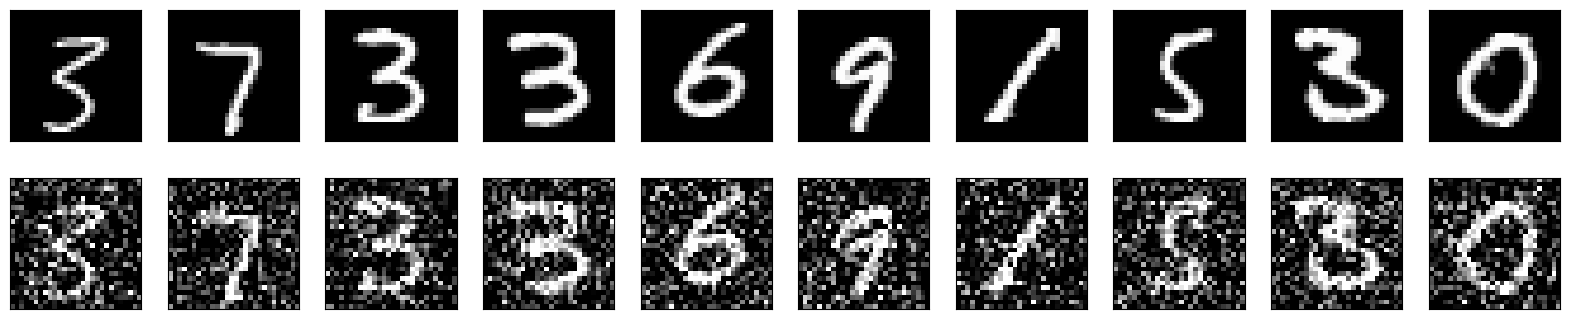

In [ ]:
(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_train_data = noise(train_data)
noise_test_data = noise(test_data)

display(train_data, noise_train_data)

In [ ]:
inputs = keras.Input(shape = (28, 28, 1))

x = layers.Conv2D(32, (3, 3), padding = "same", activation = "relu")(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2DTranspose(32, (3, 3), strides = 2, padding = "same", activation = "relu")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides = 2, padding = "same", activation = "relu")(x)
outputs = layers.Conv2D(1, (3, 3), padding = "same", activation = "sigmoid")(x)

autoencoder = keras.Model(inputs, outputs)

autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

In [ ]:
autoencoder.fit(
    x = train_data,
    y = train_data,
    batch_size = 128,
    epochs = 50,
    shuffle = True,
    validation_data = (test_data, test_data)
    )

Epoch 1/50
469/469 [==============================] - 10s 10ms/step - loss: 0.1237 - val_loss: 0.0736
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0719 - val_loss: 0.0698
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0695 - val_loss: 0.0683
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0683 - val_loss: 0.0673
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0675 - val_loss: 0.0667
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0669 - val_loss: 0.0661
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0664 - val_loss: 0.0657
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0660 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0654 - val_loss: 0.06

313/313 [==============================] - 1s 2ms/step


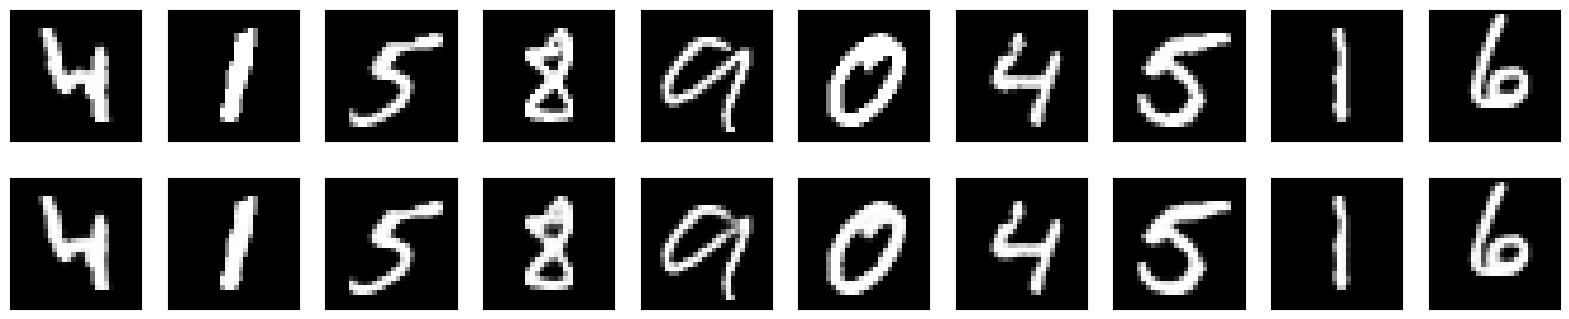

In [ ]:
pred = autoencoder.predict(test_data)
display(test_data, pred)

In [ ]:
autoencoder.fit(
    x = noise_train_data,
    y = train_data,
    batch_size = 128,
    epochs = 50,
    shuffle = True,
    validation_data = (noise_test_data, test_data)
    )

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1025 - val_loss: 0.0946
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0939 - val_loss: 0.0922
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0921 - val_loss: 0.0907
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0909 - val_loss: 0.0898
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0901 - val_loss: 0.0892
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0896 - val_loss: 0.0887
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0891 - val_loss: 0.0883
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0886 - val_loss: 0.0879
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0884 - val_loss: 0.0876
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0880 - val_loss: 0.087

313/313 [==============================] - 1s 2ms/step


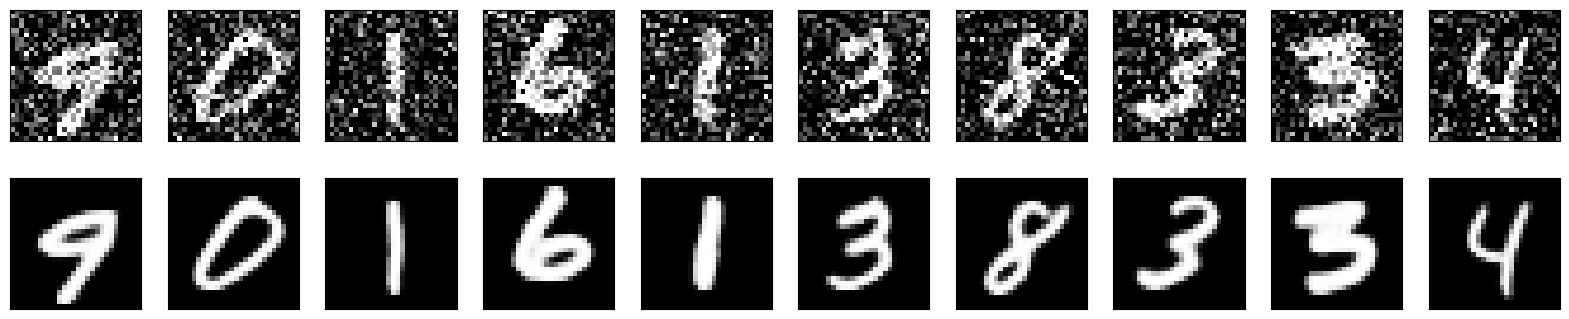

In [ ]:
pred = autoencoder.predict(test_data)
display(noise_test_data, pred)